In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
train=pd.read_csv("train.csv")

In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot: >

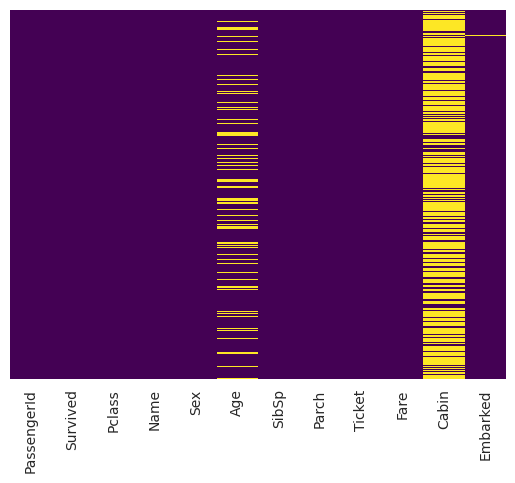

In [66]:
sns.heatmap(train.isnull(),cmap="viridis",yticklabels=False,cbar=False)

<AxesSubplot: xlabel='Survived', ylabel='count'>

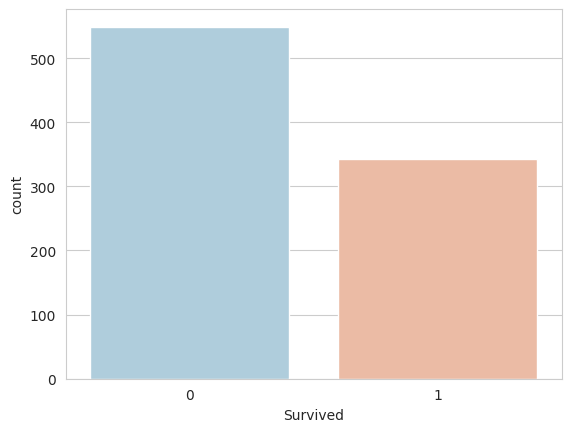

In [67]:
sns.countplot(x="Survived",data=train,palette='RdBu_r')

In [68]:
train[train.columns[1]].count()

891

In [69]:
train[train["Survived"]==1].count()["Survived"]

342

In [70]:
train[train["Survived"]==0].count()["Survived"]

549

<AxesSubplot: xlabel='Survived', ylabel='count'>

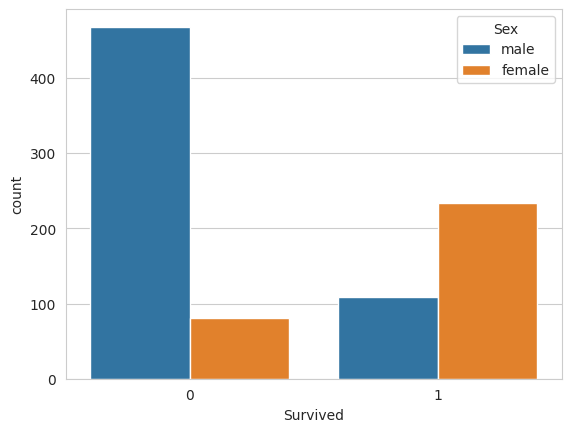

In [71]:
sns.countplot(x="Survived",data=train,hue="Sex")

In [72]:
train[(train["Survived"]==1) & (train["Sex"]=="male" )].count()["Survived"]

109

In [73]:
train[(train["Survived"]==1) & (train["Sex"]=="female" )].count()["Survived"]

233

In [74]:
train[train["Sex"]=="male"].count()["Sex"]

577

In [75]:
train[train["Sex"]=="female"].count()["Sex"]

314

<AxesSubplot: xlabel='Survived', ylabel='count'>

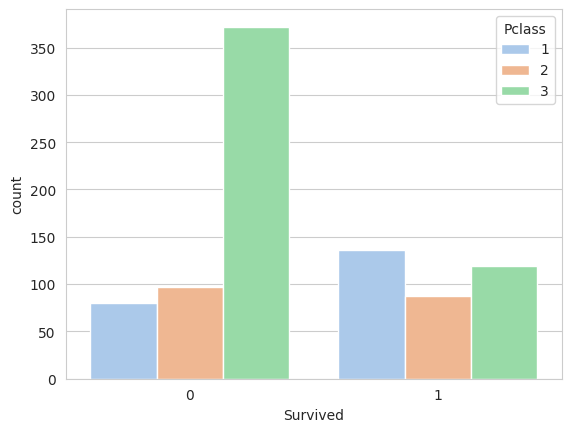

In [76]:
sns.countplot(x="Survived",hue="Pclass",data=train,palette='pastel')

In [77]:
train.groupby("Pclass").apply(len)

Pclass
1    216
2    184
3    491
dtype: int64

In [78]:
train[train["Sex"]=="male"].groupby("Pclass").apply(len)

Pclass
1    122
2    108
3    347
dtype: int64

In [79]:
train[train["Sex"]=="female"].groupby("Pclass").apply(len)

Pclass
1     94
2     76
3    144
dtype: int64

In [80]:
train[train["Survived"]==0].groupby("Pclass").apply(len)

Pclass
1     80
2     97
3    372
dtype: int64

In [81]:
train[(train["Survived"]==1) &(train["Sex"]=="female")].groupby("Pclass").apply(len)

Pclass
1    91
2    70
3    72
dtype: int64

In [82]:
train[(train["Survived"]==0) &(train["Sex"]=="female")].groupby("Pclass").apply(len)

Pclass
1     3
2     6
3    72
dtype: int64

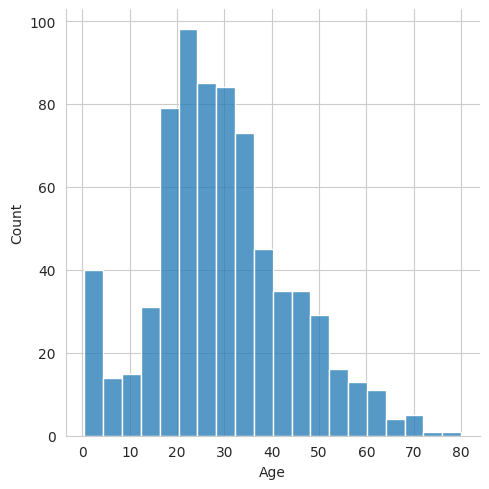

In [83]:
sns.displot(train["Age"].dropna())

In [84]:
df=train.copy()

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
def age_category(age):
    if age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Teen'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

In [87]:
df["Age category"]=df["Age"].dropna().apply(age_category)

<AxesSubplot: xlabel='Age category', ylabel='count'>

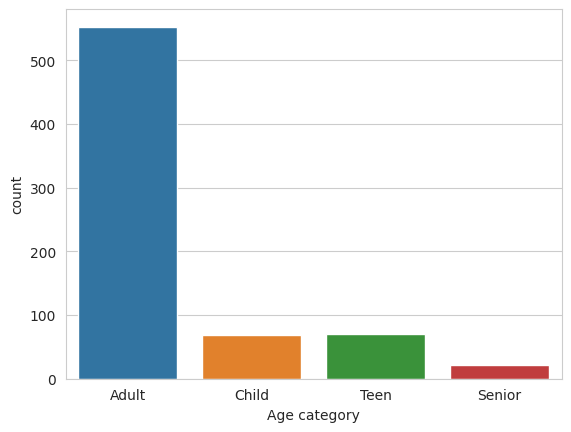

In [88]:
sns.countplot(x="Age category",data=df,)

In [89]:
df["Age category"].dtypes

dtype('O')

In [90]:
df["Age category"] = df["Age category"].astype('category')

In [91]:
df[(df["Age category"]=="Senior") &(df["Survived"]==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age category
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,Senior
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,Senior
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S,Senior
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,Senior
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,Senior


In [92]:
df[df["Age category"]=="Senior"].count()

PassengerId     22
Survived        22
Pclass          22
Name            22
Sex             22
Age             22
SibSp           22
Parch           22
Ticket          22
Fare            22
Cabin           11
Embarked        21
Age category    22
dtype: int64

In [93]:
sns.set_style("whitegrid")

<AxesSubplot: xlabel='SibSp', ylabel='count'>

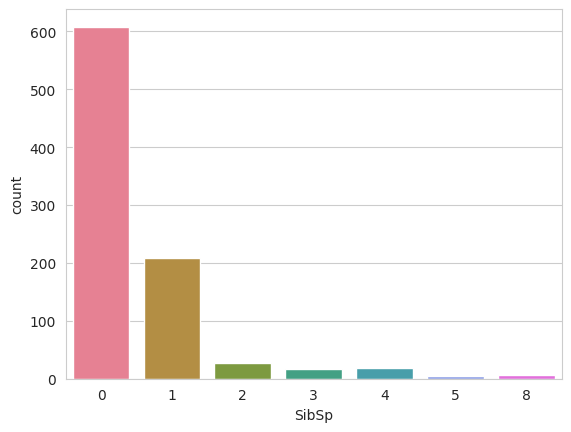

In [94]:
sns.countplot(x="SibSp",data=train,palette="husl")

Text(0.5, 1.0, 'Parch')

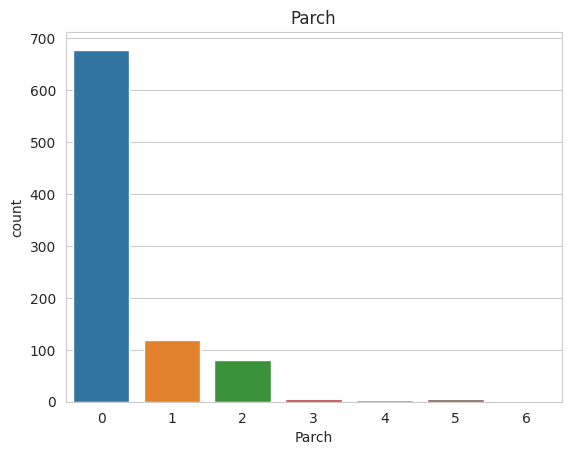

In [95]:
sns.countplot(x="Parch",data=train)
plt.title("Parch")

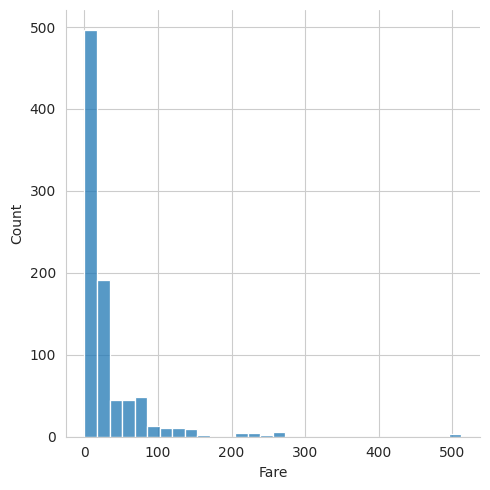

In [96]:
sns.displot(x="Fare",data=train,bins=30)

In [97]:
train[train["Fare"]>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [98]:
train[train["Fare"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [99]:
train.groupby("Embarked").apply(len)

Embarked
C    168
Q     77
S    644
dtype: int64

<AxesSubplot: xlabel='Embarked', ylabel='count'>

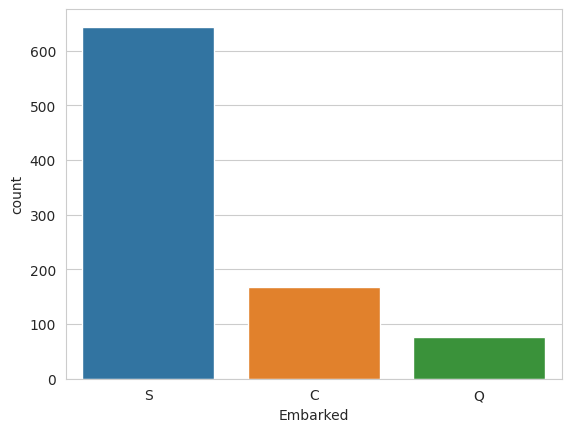

In [100]:
sns.countplot(x="Embarked",data=train)

<AxesSubplot: xlabel='Embarked', ylabel='count'>

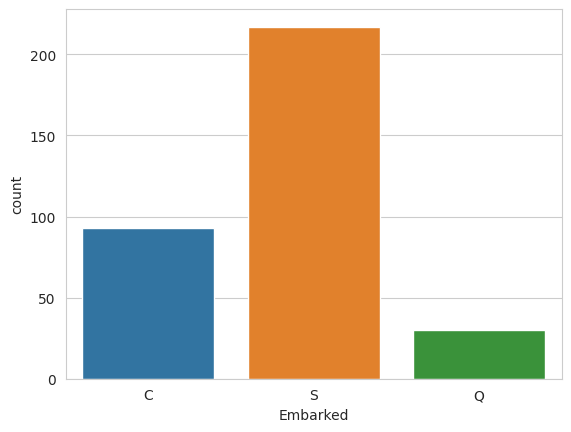

In [101]:
sns.countplot(x="Embarked",data=train[train["Survived"]==1])


<AxesSubplot: xlabel='Embarked', ylabel='count'>

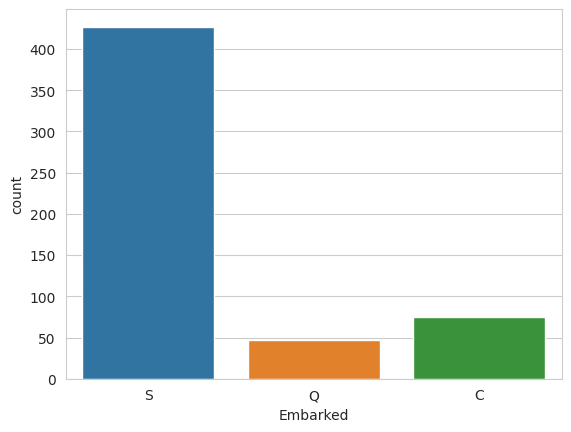

In [102]:
sns.countplot(x="Embarked",data=train[train["Survived"]==0])

In [103]:
import cufflinks as cf
cf.go_offline()

In [104]:
train["Fare"].iplot(kind="hist")

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

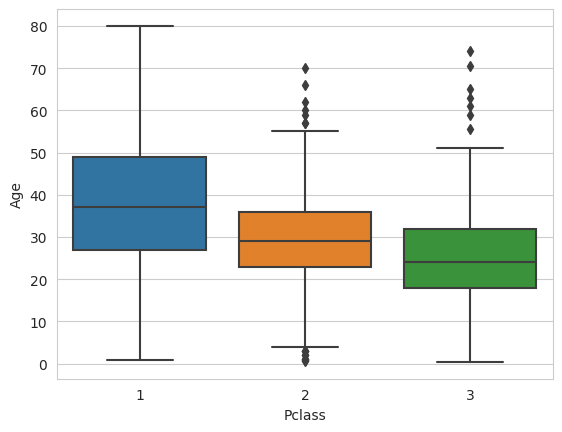

In [105]:
sns.boxplot(x="Pclass",data=train,y="Age")

In [106]:
train.groupby("Pclass").mean("Age")

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [107]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [108]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot: >

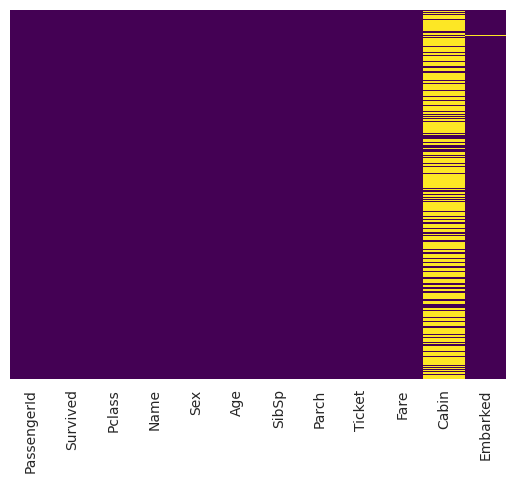

In [109]:
sns.heatmap(train.isnull(),cmap="viridis", yticklabels=False,cbar=False)

In [110]:
# train.drop("Cabin",axis=1,inplace=True)

In [111]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
gender=pd.get_dummies(train["Sex"],drop_first=True)
embarked=pd.get_dummies(train["Embarked"],drop_first=True)

In [116]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [120]:
train=pd.concat([train,gender,embarked],axis=1)

In [121]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,1,1,0,1


In [127]:
# train.drop("Cabin",axis=1,inplace=True)

In [130]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [137]:
from sklearn.linear_model import LogisticRegression

In [141]:
logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [143]:
predictions=logmodel.predict(X_test)

In [144]:
from sklearn.metrics import classification_report
cl

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])